In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce/item_properties_part1.1.csv
/kaggle/input/e-commerce/category_tree.csv
/kaggle/input/e-commerce/item_properties_part2.csv
/kaggle/input/e-commerce/events.csv


In [3]:
category_tree_df = pd.read_csv("/kaggle/input/e-commerce/category_tree.csv")

In [4]:
category_tree_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [5]:
events_df.head()

NameError: name 'events_df' is not defined

In [6]:
events_df = pd.read_csv("/kaggle/input/e-commerce/events.csv")

In [7]:
events_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [8]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [9]:
events_df["itemid"].nunique()

235061

In [10]:
item_properties1 = pd.read_csv("/kaggle/input/e-commerce/item_properties_part1.1.csv")
item_properties1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [11]:
item_properties1.tail()

,timestamp,itemid,property,value
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566
10999998,1436065200000,464846,790,n410640.000


In [12]:
item_properties2 = pd.read_csv("/kaggle/input/e-commerce/item_properties_part2.csv")
item_properties2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [13]:
item_properties2.tail()

,timestamp,itemid,property,value
9275898,1433646000000,236931,929,n12.000
9275899,1440903600000,455746,6,150169 639134
9275900,1439694000000,347565,686,610834
9275901,1433646000000,287231,867,769062
9275902,1442113200000,275768,888,888666 n10800.000 746840 1318567


In [14]:
# Convert timestamp column in item properties datasets
item_properties1["timestamp"] = pd.to_datetime(item_properties1["timestamp"], unit="ms")
item_properties2["timestamp"] = pd.to_datetime(item_properties2["timestamp"], unit="ms")

In [15]:
item_properties1.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


In [16]:
events_df["timestamp"] = pd.to_datetime(events_df["timestamp"], unit="ms")

In [17]:
events_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


In [18]:
events_df["event"].value_counts()

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [19]:
events_df.duplicated().sum()

460

In [20]:
events_df.drop_duplicates(inplace=True)
# dropping duplicate values

In [21]:
events_df.shape

(2755641, 5)

In [18]:
events_df.groupby("visitorid")["event"].sum()

visitorid
0                              viewviewview
1                                      view
2          viewviewviewviewviewviewviewview
3                                      view
4                                      view
                         ...               
1407575                                view
1407576                                view
1407577                                view
1407578                                view
1407579                                view
Name: event, Length: 1407580, dtype: object

In [22]:
# Merge both item properties datasets
item_properties_df = pd.concat([item_properties1, item_properties2])

In [23]:
item_properties_df.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


In [24]:
item_properties_df.tail()

,timestamp,itemid,property,value
9275898,2015-06-07 03:00:00,236931,929,n12.000
9275899,2015-08-30 03:00:00,455746,6,150169 639134
9275900,2015-08-16 03:00:00,347565,686,610834
9275901,2015-06-07 03:00:00,287231,867,769062
9275902,2015-09-13 03:00:00,275768,888,888666 n10800.000 746840 1318567


In [25]:
item_properties_df["timestamp"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2015-06-28 03:00:00
1         2015-09-06 03:00:00
2         2015-08-09 03:00:00
3         2015-05-10 03:00:00
4         2015-05-17 03:00:00
                  ...        
9275898   2015-06-07 03:00:00
9275899   2015-08-30 03:00:00
9275900   2015-08-16 03:00:00
9275901   2015-06-07 03:00:00
9275902   2015-09-13 03:00:00
Name: timestamp, Length: 20275902, dtype: datetime64[ns]>

In [26]:
# Unique values in each Item_properties column
print("\n Unique Value Counts per Column:")
for col_name in item_properties_df.columns:
    unique_vals = item_properties_df[col_name].nunique()
    print(f"  {col_name}: {unique_vals}")


 Unique Value Counts per Column:
  timestamp: 18
  itemid: 417053
  property: 1104
  value: 1966868


In [27]:
events_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


In [27]:
 #Step 2: Detect and Remove Abnormal Users Before Merging
user_group = events_df.groupby("visitorid").agg(
    total_addtocart=("event", lambda x: (x == "addtocart").sum()),
    total_views=("event", lambda x: (x == "view").sum()),
    total_transaction=("event", lambda x: (x == "transaction").sum())
).reset_index()

In [28]:
print(user_group)

         visitorid  total_addtocart  total_views  total_transaction
0                0                0            3                  0
1                1                0            1                  0
2                2                0            8                  0
3                3                0            1                  0
4                4                0            1                  0
...            ...              ...          ...                ...
1407575    1407575                0            1                  0
1407576    1407576                0            1                  0
1407577    1407577                0            1                  0
1407578    1407578                0            1                  0
1407579    1407579                0            1                  0

[1407580 rows x 4 columns]


In [29]:
# Calculate cart-to-view ratio
user_group["cart_to_view_ratio"] = user_group["total_addtocart"] / (user_group["total_views"] + 1)

In [30]:
# Calculate cart-to-view ratio
user_group["transact_to_cart_ratio"] = user_group["total_transaction"] / (user_group["total_addtocart"] + 1)

In [31]:
user_group.head()

,visitorid,total_addtocart,total_views,total_transaction,cart_to_view_ratio,transact_to_cart_ratio
0,0,0,3,0,0.0,0.0
1,1,0,1,0,0.0,0.0
2,2,0,8,0,0.0,0.0
3,3,0,1,0,0.0,0.0
4,4,0,1,0,0.0,0.0


In [32]:
print(user_group)

         visitorid  total_addtocart  total_views  total_transaction  \
0                0                0            3                  0   
1                1                0            1                  0   
2                2                0            8                  0   
3                3                0            1                  0   
4                4                0            1                  0   
...            ...              ...          ...                ...   
1407575    1407575                0            1                  0   
1407576    1407576                0            1                  0   
1407577    1407577                0            1                  0   
1407578    1407578                0            1                  0   
1407579    1407579                0            1                  0   

         cart_to_view_ratio  transact_to_cart_ratio  
0                       0.0                     0.0  
1                       0.0            

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of abnormal users detected: 14059


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


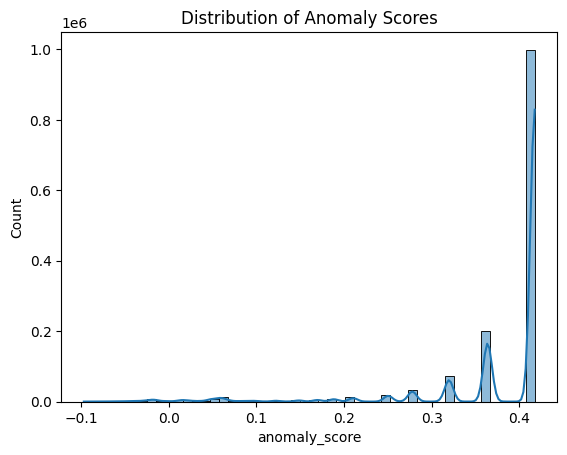

In [33]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Select relevant features for anomaly detection
features = ["cart_to_view_ratio", "total_addtocart", "total_views", "total_transaction","transact_to_cart_ratio"]
user_features = user_group[features].copy()

# Handle missing values (if any)
user_features.fillna(0, inplace=True)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(user_features)

# Predict anomalies (-1 = anomaly, 1 = normal)
user_group["anomaly"] = iso_forest.predict(user_features)

# Filter out abnormal users
abnormal_users = user_group[user_group["anomaly"] == -1]

# Count of abnormal users detected
print(f"Number of abnormal users detected: {abnormal_users.shape[0]}")

# Visualizing anomaly scores
import matplotlib.pyplot as plt
import seaborn as sns

user_group["anomaly_score"] = iso_forest.decision_function(user_features)
sns.histplot(user_group["anomaly_score"], bins=50, kde=True)
plt.title("Distribution of Anomaly Scores")
plt.show()

In [ ]:
print(threshold)

In [36]:
abnormal_users.head()

,visitorid,total_addtocart,total_views,total_transaction,cart_to_view_ratio,transact_to_cart_ratio,anomaly
155,155,7,7,0,0.875000,0.000000,-1
172,172,3,33,2,0.088235,0.500000,-1
186,186,1,2,1,0.333333,0.500000,-1
264,264,2,3,2,0.500000,0.666667,-1
419,419,1,4,1,0.200000,0.500000,-1


In [37]:
abnormal_users.tail()

,visitorid,total_addtocart,total_views,total_transaction,cart_to_view_ratio,transact_to_cart_ratio,anomaly
1406981,1406981,1,4,1,0.200000,0.50,-1
1407070,1407070,3,1,1,1.500000,0.25,-1
1407110,1407110,1,7,1,0.125000,0.50,-1
1407398,1407398,1,0,1,1.000000,0.50,-1
1407512,1407512,8,14,0,0.533333,0.00,-1


In [ ]:
abnormal_users.count()

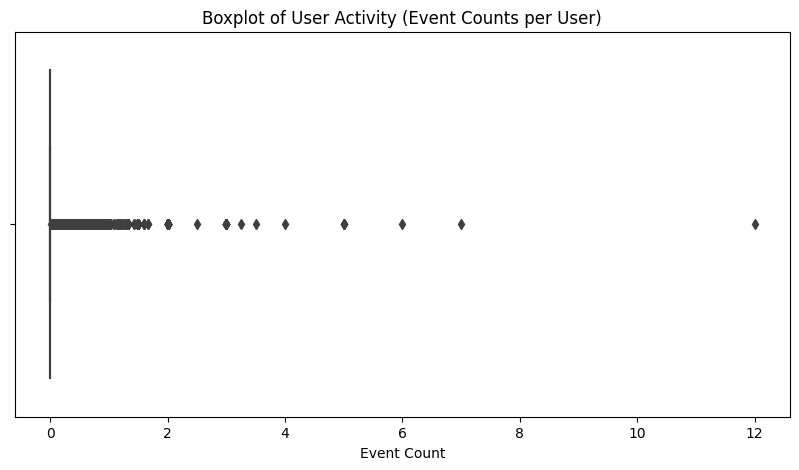

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


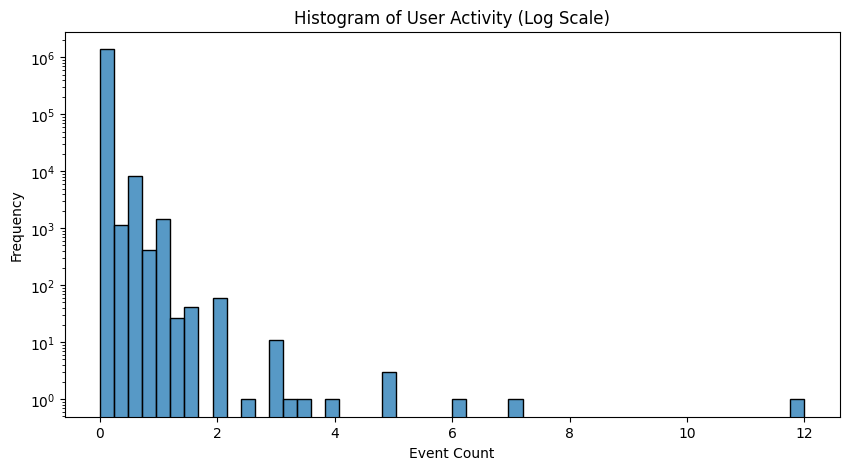

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute user activity (event counts per user)
#user_activity = events_df.groupby("visitorid").size().reset_index(name="event_count")

# Plot Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=user_group["transact_to_cart_ratio"])
plt.title("Boxplot of User Activity (Event Counts per User)")
plt.xlabel("Event Count")
plt.show()

# Plot Histogram
plt.figure(figsize=(10, 5))
sns.histplot(x=user_group["transact_to_cart_ratio"], bins=50, log_scale=(False, True))
plt.title("Histogram of User Activity (Log Scale)")
plt.xlabel("Event Count")
plt.ylabel("Frequency")
plt.show()

In [41]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features = ["cart_to_view_ratio", "transact_to_cart_ratio"]

# Initialize and train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
user_group["anomaly"] = iso_forest.fit_predict(user_group[features])

# Anomalies are labeled as -1, normal users as 1
anomalies_detected = user_group[user_group["anomaly"] == -1]
print(f"Detected {len(anomalies_detected)} anomalies")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Detected 26862 anomalies


In [42]:
anomalies_detected.head()

,visitorid,total_addtocart,total_views,total_transaction,cart_to_view_ratio,transact_to_cart_ratio,anomaly,anomaly_score
155,155,7,7,0,0.875000,0.000000,-1,-0.033187
172,172,3,33,2,0.088235,0.500000,-1,-0.059666
177,177,1,2,0,0.333333,0.000000,-1,0.058374
186,186,1,2,1,0.333333,0.500000,-1,-0.015811
264,264,2,3,2,0.500000,0.666667,-1,-0.036873


In [44]:
anomalies_detected.shape

(26862, 8)

In [ ]:
Q11 = user_activity["event_count"].quantile(0.25)
Q33 = user_activity["event_count"].quantile(0.75)
IQR1 = Q33 - Q11

# Define outlier threshold
upper_threshold1 = Q33 + 1.5 * IQR1
lower_threshold1 = max(Q11 - 1.5 * IQR1, 1)  # Ensure lower threshold is at least 1

print(f"Using IQR, lower threshold: {lower_threshold}, upper threshold: {upper_threshold}")

In [ ]:
Q1 = user_group["cart_to_view_ratio"].quantile(0.25)  # First quartile (25%)
Q3 = user_group["cart_to_view_ratio"].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define outlier threshold
lower_threshold = max(Q1 - 1.5 * IQR, 0)  # Avoid negative thresholds
upper_threshold = Q3 + 1.5 * IQR  # Upper bound for normal users

print(f"IQR Lower Threshold: {lower_threshold}")
print(f"IQR Upper Threshold: {upper_threshold}")

most values are 0, hence having 0 for lower and upper IQR

In [34]:
events_df = events_df[~events_df["visitorid"].isin(abnormal_users)]

In [35]:
events_df.shape

(2755641, 5)

In [45]:
events_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


In [46]:
events_df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN
2756100,2015-08-01 03:36:03.914,199536,view,152913,NaN


In [47]:
events_df.shape

(2755641, 5)

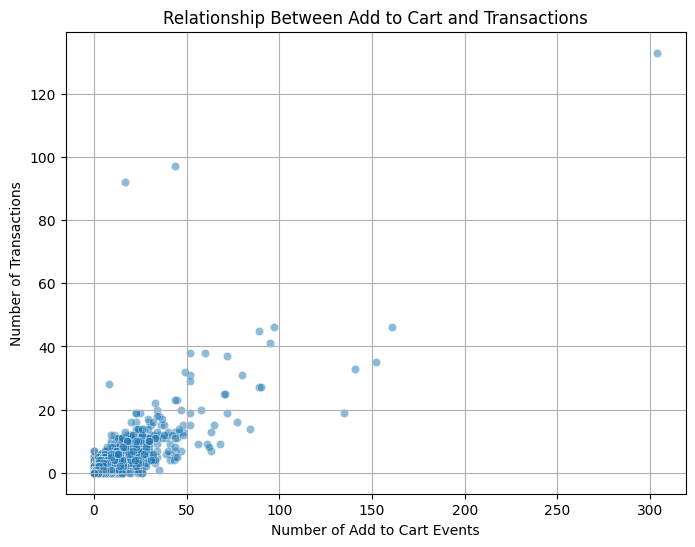

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data per item or per user (choose one)
grouped_df = events_df.groupby("itemid")["event"].value_counts().unstack(fill_value=0)

# Extract 'addtocart' and 'transaction' counts
x = grouped_df["addtocart"]
y = grouped_df["transaction"]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.xlabel("Number of Add to Cart Events")
plt.ylabel("Number of Transactions")
plt.title("Relationship Between Add to Cart and Transactions")
plt.grid(True)

# Show plot
plt.show()

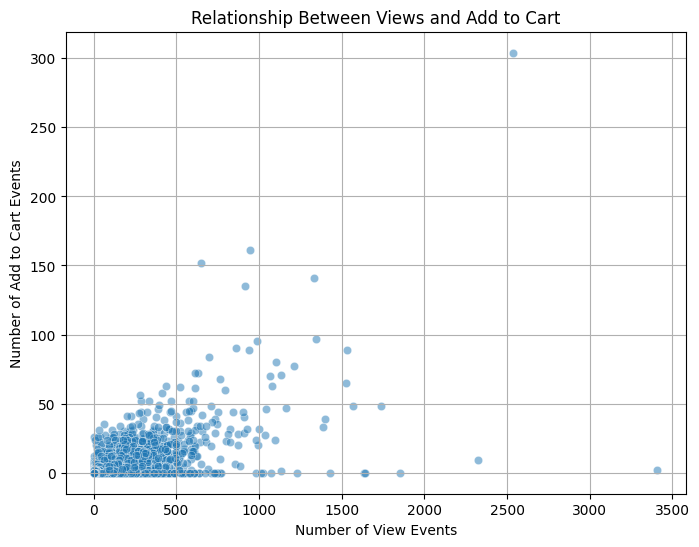

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data per item
grouped_df = events_df.groupby("itemid")["event"].value_counts().unstack(fill_value=0)

# Extract 'view' and 'addtocart' counts
x = grouped_df["view"]
y = grouped_df["addtocart"]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.xlabel("Number of View Events")
plt.ylabel("Number of Add to Cart Events")
plt.title("Relationship Between Views and Add to Cart")
plt.grid(True)

# Show plot
plt.show()

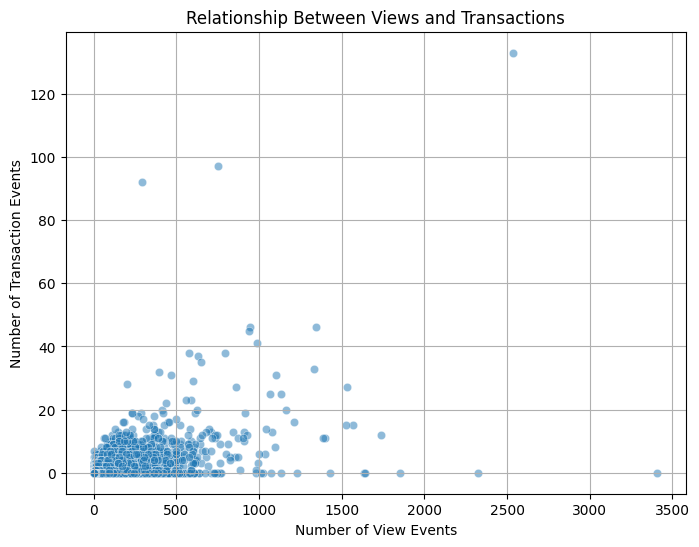

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data per item
grouped_df = events_df.groupby("itemid")["event"].value_counts().unstack(fill_value=0)

# Extract 'view' and 'transaction' counts
x = grouped_df["view"]
y = grouped_df["transaction"]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.xlabel("Number of View Events")
plt.ylabel("Number of Transaction Events")
plt.title("Relationship Between Views and Transactions")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
events_df.info()

In [ ]:
events_df.head()

In [31]:
mask = item_properties_df["property"].isin(["available","categoryid"])

item_properties_df.loc[mask,"property"] = item_properties_df.loc[mask,"value"]

print(item_properties_df.head())

            timestamp  itemid property                            value
0 2015-06-28 03:00:00  460429     1338                             1338
1 2015-09-06 03:00:00  206783      888          1116713 960601 n277.200
2 2015-08-09 03:00:00  395014      400  n552.000 639502 n720.000 424566
3 2015-05-10 03:00:00   59481      790                       n15360.000
4 2015-05-17 03:00:00  156781      917                           828513


In [32]:
item_properties_df.tail()

,timestamp,itemid,property,value
9275898,2015-06-07 03:00:00,236931,929,n12.000
9275899,2015-08-30 03:00:00,455746,6,150169 639134
9275900,2015-08-16 03:00:00,347565,686,610834
9275901,2015-06-07 03:00:00,287231,867,769062
9275902,2015-09-13 03:00:00,275768,888,888666 n10800.000 746840 1318567


In [33]:
item_properties_df["property"].value_counts()

property
888     3000456
790     1790637
0        904651
1        647069
6        631485
         ...   
1152          1
1597          1
1459          1
1571          1
1548          1
Name: count, Length: 1529, dtype: int64

In [34]:
item_properties_df.shape

(20275902, 4)

In [35]:
item_properties_df["property"] = item_properties_df["property"].astype("int")

In [36]:
item_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   int64         
 3   value      object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 773.5+ MB


### Data merging. merging events data and item properties
Time-Based Approximate Merge

since timestamps timestamps are close but not exact, use a nearest neighbor join or time window merge.
This ensures that each event is matched with the most relevant item properties.

In [28]:
item_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   itemid     int64         
 2   property   object        
 3   value      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 773.5+ MB


In [47]:
# Find common timestamps between events_df and item_properties_df
common_timestamps = set(events_df["timestamp"]).intersection(set(item_properties_df["timestamp"]))

# Count how many rows in each dataset have these common timestamps
events_matches = events_df[events_df["timestamp"].isin(common_timestamps)].shape[0]
item_properties_matches = item_properties_df[item_properties_df["timestamp"].isin(common_timestamps)].shape[0]

print(f"Total matching timestamps: {len(common_timestamps)}")
print(f"Rows in events_df with matching timestamps: {events_matches}")
print(f"Rows in item_properties_df with matching timestamps: {item_properties_matches}")

Total matching timestamps: 0
Rows in events_df with matching timestamps: 0
Rows in item_properties_df with matching timestamps: 0


In [51]:
# confirming if all the property column in item properties have a matching value in the categoryid of the category tree datset

# Find common values between 'property' in item_properties_df and 'categoryid' in category_tree_df
common_categoryid = set(item_properties_df["property"]).intersection(set(category_tree_df["categoryid"]))

# Count how many rows in each dataset have these common values
item_properties_matches = item_properties_df[item_properties_df["property"].isin(common_categoryid)].shape[0]
category_tree_matches = category_tree_df[category_tree_df["categoryid"].isin(common_categoryid)].shape[0]

print(f"Total matching category IDs: {len(common_categoryid)}")
print(f"Rows in item_properties_df with matching category IDs: {item_properties_matches}")
print(f"Rows in category_tree_df with matching category IDs: {category_tree_matches}")


Total matching category IDs: 1499
Rows in item_properties_df with matching category IDs: 20165432
Rows in category_tree_df with matching category IDs: 1499


In [57]:
# Find properties that do NOT have a match in category_tree_df
unmatched_properties = set(item_properties_df["property"]) - set(category_tree_df["categoryid"])

print(f"Total unmatched properties: {len(unmatched_properties)}")
print("Sample unmatched properties:", list(unmatched_properties)[:10])  # Show first 10 for inspection

Total unmatched properties: 30
Sample unmatched properties: [1538, 899, 1158, 1428, 1046, 919, 280, 930, 1571, 1062]


In [59]:
print(unmatched_properties)

{1538, 899, 1158, 1428, 1046, 919, 280, 930, 1571, 1062, 1319, 168, 1446, 554, 171, 300, 306, 307, 181, 566, 1594, 1597, 1602, 462, 974, 80, 721, 345, 347, 1123}


In [60]:
unmatched_df = item_properties_df[item_properties_df["property"].isin(unmatched_properties)]
print(unmatched_df["property"].value_counts())  # Count occurrences of unmatched properties

property
566     72967
899      8897
974      6322
307      5017
280      4222
300      4100
181      2647
80       1600
306      1551
347      1092
168       835
554       557
919       138
930       130
462       106
171       102
1062       88
345        45
721        30
1446        7
1046        7
1158        2
1319        1
1428        1
1597        1
1571        1
1538        1
1594        1
1602        1
1123        1
Name: count, dtype: int64


In [61]:
# getting itemid which do not have corresponding id in the category
unmatched_itemids = item_properties_df[item_properties_df["property"].isin(unmatched_properties)]["itemid"].unique()

In [62]:
existing_itemids = events_df["itemid"].unique()
matched_itemids = set(unmatched_itemids).intersection(set(existing_itemids))

print(f"Total unmatched itemids: {len(unmatched_itemids)}")
print(f"Itemids found in events_df: {len(matched_itemids)}")
print(f"Itemids NOT found in events_df: {len(unmatched_itemids) - len(matched_itemids)}")

Total unmatched itemids: 56564
Itemids found in events_df: 30306
Itemids NOT found in events_df: 26258


events_df and item_properties do not have a common timestamp and trying to merge on just itemid will create lots of duplicates. hence we will resort to time based approximate merge. this will ensure that all rows in events data are maintained whiles merging with the most nearest timestamp

In [29]:
print(events_df["timestamp"].isna().sum())  
print(item_properties_df["timestamp"].isna().sum())

0
0


In [30]:
print(events_df["timestamp"].dtype)
print(item_properties_df["timestamp"].dtype)

datetime64[ns]
datetime64[ns]


In [31]:
# Ensure both DataFrames are sorted by "timestamp"
events_df_copy = events_df.copy().sort_values("timestamp") # Sort by timestamp only
item_properties_df_copy = item_properties_df.copy().sort_values(["timestamp"])

# Convert timestamp to datetime if not already
events_df_copy["timestamp"] = pd.to_datetime(events_df_copy["timestamp"])
item_properties_df_copy["timestamp"] = pd.to_datetime(item_properties_df_copy["timestamp"])

# Perform the asof merge
merged_df = pd.merge_asof(
    events_df_copy,
    item_properties_df_copy,
    on="timestamp",
    by="itemid",
    direction="backward"  # Match the closest past timestamp
)

In [32]:
merged_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid,property,value
0,2015-05-03 03:00:04.384,693516,addtocart,297662,NaN,NaN,NaN
1,2015-05-03 03:00:11.289,829044,view,60987,NaN,NaN,NaN
2,2015-05-03 03:00:13.048,652699,view,252860,NaN,NaN,NaN
3,2015-05-03 03:00:24.154,1125936,view,33661,NaN,NaN,NaN
4,2015-05-03 03:00:26.228,693516,view,297662,NaN,NaN,NaN


In [33]:
merged_df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid,property,value
2755636,2015-09-18 02:59:24.029,472345,view,301436,NaN,categoryid,1244
2755637,2015-09-18 02:59:25.499,1207677,view,310922,NaN,888,684068 n48.000 1187104 1154859
2755638,2015-09-18 02:59:34.109,255126,view,47467,NaN,227,780351
2755639,2015-09-18 02:59:41.778,622226,view,345308,NaN,available,1
2755640,2015-09-18 02:59:47.788,1287495,view,98299,NaN,978,696833 670342


In [34]:
merged_df.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
property          393175
value             393175
dtype: int64

In [80]:
final_df = merged_df.merge(
    category_tree_df,
    left_on="property",
    right_on="categoryid",
    how="left"  # Use left join to keep all event records
)


In [36]:
final_df = merged_df

In [43]:
final_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid,property,value
0,2015-05-03 03:00:04.384,693516,addtocart,297662,NaN,NaN,NaN
1,2015-05-03 03:00:11.289,829044,view,60987,NaN,NaN,NaN
2,2015-05-03 03:00:13.048,652699,view,252860,NaN,NaN,NaN
3,2015-05-03 03:00:24.154,1125936,view,33661,NaN,NaN,NaN
4,2015-05-03 03:00:26.228,693516,view,297662,NaN,NaN,NaN


In [44]:
final_df.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
property          393175
value             393175
dtype: int64

In [38]:
mask = final_df["property"].isin(["available","categoryid"])

final_df.loc[mask,"property"] = final_df.loc[mask,"value"]

print(final_df.head())

                timestamp  visitorid      event  itemid  transactionid  \
0 2015-05-03 03:00:04.384     693516  addtocart  297662            NaN   
1 2015-05-03 03:00:11.289     829044       view   60987            NaN   
2 2015-05-03 03:00:13.048     652699       view  252860            NaN   
3 2015-05-03 03:00:24.154    1125936       view   33661            NaN   
4 2015-05-03 03:00:26.228     693516       view  297662            NaN   

  property value  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [39]:
final_df.describe()

,timestamp,visitorid,itemid,transactionid
count,2755641,2.755641e+06,2.755641e+06,22457.000000
mean,2015-07-09 06:46:18.779006976,7.019227e+05,2.349214e+05,8826.497796
min,2015-05-03 03:00:04.384000,0.000000e+00,3.000000e+00,0.000000
25%,2015-06-05 04:21:34.039000064,3.505660e+05,1.181200e+05,4411.000000
50%,2015-07-09 14:39:51.604000,7.020600e+05,2.360620e+05,8813.000000
75%,2015-08-10 16:44:03.217999872,1.053443e+06,3.507140e+05,13224.000000
max,2015-09-18 02:59:47.788000,1.407579e+06,4.668670e+05,17671.000000
std,NaN,4.056892e+05,1.341947e+05,5098.996290


Investigsting missing values in property with their corresponding values
Check if missing values are linked to specific item types

In [40]:
missing_properties = final_df[final_df["property"].isna()]
print(missing_properties["event"].value_counts())  # Do views or carts have missing properties?

event
view           386866
addtocart        4616
transaction      1693
Name: count, dtype: int64


In [48]:
final_df["itemid"].nunique()

235061

In [49]:
#Check If Missing Properties Are Linked to Specific Items
missing_property_items = final_df[final_df["property"].isna()]["itemid"].nunique()
print(f"Unique items missing properties: {missing_property_items}")

Unique items missing properties: 96335


In [50]:
category_tree_df["categoryid"].count()

1669

## Feature Engineering

In [45]:
import pandas as pd

# Assuming `final_df` is the merged dataset containing user interactions, item properties, and categories.

# User Behavior Features
user_features = final_df.groupby("visitorid").agg(
    total_views=("event", lambda x: (x == "view").sum()),
    total_addtocart=("event", lambda x: (x == "addtocart").sum()),
    total_transactions=("event", lambda x: (x == "transaction").sum()),
    last_event_time=("timestamp", "max"),
    avg_time_between_actions=("timestamp", lambda x: x.diff().mean())
).reset_index()

# Conversion Ratios
user_features["cart_to_view_ratio"] = user_features["total_addtocart"] / user_features["total_views"]
user_features["transaction_to_cart_ratio"] = user_features["total_transactions"] / user_features["total_addtocart"]
user_features["transaction_to_view_ratio"] = user_features["total_transactions"] / user_features["total_views"]

# Fill missing values (e.g., div by zero cases)
user_features = user_features.fillna(0)

# Item-Based Features
item_features = final_df.groupby("itemid").agg(
    item_views=("event", lambda x: (x == "view").sum()),
    item_addtocart=("event", lambda x: (x == "addtocart").sum()),
    item_transactions=("event", lambda x: (x == "transaction").sum())  
).reset_index()

# Item Conversion Rate
item_features["item_conversion_rate"] = item_features["item_transactions"] / item_features["item_views"]
item_features = item_features.fillna(0)


# Merge Features Back to Final Dataset
final_df = final_df.merge(user_features, on="visitorid", how="left")
final_df = final_df.merge(item_features, on="itemid", how="left")

print("Feature engineering complete!")

print(final_df.head())

Feature engineering complete!
                timestamp  visitorid      event  itemid  transactionid  \
0 2015-05-03 03:00:04.384     693516  addtocart  297662            NaN   
1 2015-05-03 03:00:11.289     829044       view   60987            NaN   
2 2015-05-03 03:00:13.048     652699       view  252860            NaN   
3 2015-05-03 03:00:24.154    1125936       view   33661            NaN   
4 2015-05-03 03:00:26.228     693516       view  297662            NaN   

  property value  total_views  total_addtocart  total_transactions  \
0      NaN   NaN            1                2                   0   
1      NaN   NaN            1                0                   0   
2      NaN   NaN            1                0                   0   
3      NaN   NaN            1                0                   0   
4      NaN   NaN            1                2                   0   

          last_event_time avg_time_between_actions  cart_to_view_ratio  \
0 2015-05-03 03:00:29.427   0 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [46]:
final_df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid,property,value,total_views,total_addtocart,total_transactions,last_event_time,avg_time_between_actions,cart_to_view_ratio,transaction_to_cart_ratio,transaction_to_view_ratio,item_views,item_addtocart,item_transactions,item_conversion_rate
2755636,2015-09-18 02:59:24.029,472345,view,301436,NaN,1244,1244,1,0,0,2015-09-18 02:59:24.029,0,0.0,0.0,0.0,1,0,0,0.000000
2755637,2015-09-18 02:59:25.499,1207677,view,310922,NaN,888,684068 n48.000 1187104 1154859,1,0,0,2015-09-18 02:59:25.499,0,0.0,0.0,0.0,27,0,0,0.000000
2755638,2015-09-18 02:59:34.109,255126,view,47467,NaN,227,780351,1,0,0,2015-09-18 02:59:34.109,0,0.0,0.0,0.0,4,0,0,0.000000
2755639,2015-09-18 02:59:41.778,622226,view,345308,NaN,1,1,1,0,0,2015-09-18 02:59:41.778,0,0.0,0.0,0.0,124,6,2,0.016129
2755640,2015-09-18 02:59:47.788,1287495,view,98299,NaN,978,696833 670342,2,0,0,2015-09-18 02:59:47.788,0 days 00:15:09.441000,0.0,0.0,0.0,8,0,0,0.000000


In [48]:
# Calculate session length
final_df['session_length'] = final_df.groupby("visitorid")['timestamp'].transform(lambda x: (x.max() - x.min()).total_seconds())


KeyboardInterrupt: 

In [49]:
final_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timestamp,visitorid,event,itemid,transactionid,property,value,total_views,total_addtocart,total_transactions,last_event_time,avg_time_between_actions,cart_to_view_ratio,transaction_to_cart_ratio,transaction_to_view_ratio,item_views,item_addtocart,item_transactions,item_conversion_rate,session_length
0,2015-05-03 03:00:04.384,693516,addtocart,297662,NaN,NaN,NaN,1,2,0,2015-05-03 03:00:29.427,0 days 00:00:12.521500,2.0,0.0,0.0,59,4,0,0.0,25.043
1,2015-05-03 03:00:11.289,829044,view,60987,NaN,NaN,NaN,1,0,0,2015-05-03 03:00:11.289,0,0.0,0.0,0.0,79,0,0,0.0,0.000
2,2015-05-03 03:00:13.048,652699,view,252860,NaN,NaN,NaN,1,0,0,2015-05-03 03:00:13.048,0,0.0,0.0,0.0,248,0,0,0.0,0.000
3,2015-05-03 03:00:24.154,1125936,view,33661,NaN,NaN,NaN,1,0,0,2015-05-03 03:00:24.154,0,0.0,0.0,0.0,63,0,0,0.0,0.000
4,2015-05-03 03:00:26.228,693516,view,297662,NaN,NaN,NaN,1,2,0,2015-05-03 03:00:29.427,0 days 00:00:12.521500,2.0,0.0,0.0,59,4,0,0.0,25.043


In [50]:
col = ["last_event_time","avg_time_between_actions","avg_time_between_actions"]
final_df.drop(columns=col, inplace=True)

In [64]:
final_df.head()

,timestamp,visitorid,event,itemid,transactionid,property,value,total_views,total_addtocart,total_transactions,cart_to_view_ratio,transaction_to_cart_ratio,transaction_to_view_ratio,item_views,item_addtocart,item_transactions,item_conversion_rate,session_length
0,2015-05-03 03:00:04.384,693516,addtocart,297662,-1,-1,-1,1,2,0,2.0,0.0,0.0,59,4,0,0.0,25.043
1,2015-05-03 03:00:11.289,829044,view,60987,-1,-1,-1,1,0,0,0.0,0.0,0.0,79,0,0,0.0,0.000
2,2015-05-03 03:00:13.048,652699,view,252860,-1,-1,-1,1,0,0,0.0,0.0,0.0,248,0,0,0.0,0.000
3,2015-05-03 03:00:24.154,1125936,view,33661,-1,-1,-1,1,0,0,0.0,0.0,0.0,63,0,0,0.0,0.000
4,2015-05-03 03:00:26.228,693516,view,297662,-1,-1,-1,1,2,0,2.0,0.0,0.0,59,4,0,0.0,25.043


In [51]:
final_df.columns

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid',
       'property', 'value', 'total_views', 'total_addtocart',
       'total_transactions', 'cart_to_view_ratio', 'transaction_to_cart_ratio',
       'transaction_to_view_ratio', 'item_views', 'item_addtocart',
       'item_transactions', 'item_conversion_rate', 'session_length'],
      dtype='object')

Since from the data dictionary, about 90% of the event dataset has a corresponding item properties, then it implies, some itemid in the events dataset where not categorized. hence, we will replace missing values in the propert and value column with unknown.

In [52]:
final_df.duplicated().sum()

0

In [53]:
final_df.isna().sum()

timestamp                          0
visitorid                          0
event                              0
itemid                             0
transactionid                2733184
property                      393175
value                         393175
total_views                        0
total_addtocart                    0
total_transactions                 0
cart_to_view_ratio                 0
transaction_to_cart_ratio          0
transaction_to_view_ratio          0
item_views                         0
item_addtocart                     0
item_transactions                  0
item_conversion_rate               0
session_length                     0
dtype: int64

In [49]:
category_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   timestamp                  datetime64[ns]
 1   visitorid                  int64         
 2   event                      object        
 3   itemid                     int64         
 4   transactionid              float64       
 5   property                   float64       
 6   value                      object        
 7   total_views                int64         
 8   total_addtocart            int64         
 9   total_transactions         int64         
 10  cart_to_view_ratio         float64       
 11  transaction_to_cart_ratio  float64       
 12  transaction_to_view_ratio  float64       
 13  item_views                 int64         
 14  item_addtocart             int64         
 15  item_transactions          int64         
 16  item_conversion_rate       float64  

### Handling missing values in the final datframe

In [55]:
mask = final_df["property"].isin(["available","categoryid"])

final_df.loc[mask,"property"] = final_df.loc[mask,"value"]

print(final_df.head())

                timestamp  visitorid      event  itemid  transactionid  \
0 2015-05-03 03:00:04.384     693516  addtocart  297662             -1   
1 2015-05-03 03:00:11.289     829044       view   60987             -1   
2 2015-05-03 03:00:13.048     652699       view  252860             -1   
3 2015-05-03 03:00:24.154    1125936       view   33661             -1   
4 2015-05-03 03:00:26.228     693516       view  297662             -1   

  property                                              value  total_views  \
0      790                                         n14280.000            1   
1      815                                             769062            1   
2      NaN                                                NaN            1   
3      888  756593 1266042 1268055 1146137 424566 1297729 ...            1   
4      790                                         n14280.000            1   

   total_addtocart  total_transactions  cart_to_view_ratio  \
0                2      

In [54]:
final_df["transactionid"] = final_df["transactionid"].fillna(-1).astype(int)

In [55]:
final_df["property"] = final_df["property"].fillna(-1).astype(int)

In [56]:
final_df["property"].value_counts()

property
 790     524257
 888     394716
-1       393175
 1       263745
 0        78982
          ...  
 791          1
 1556         1
 1548         1
 1148         1
 288          1
Name: count, Length: 1380, dtype: int64

In [57]:
final_df["value"] = final_df["value"].fillna(-1)

In [58]:
final_df.isna().sum()

timestamp                    0
visitorid                    0
event                        0
itemid                       0
transactionid                0
property                     0
value                        0
total_views                  0
total_addtocart              0
total_transactions           0
cart_to_view_ratio           0
transaction_to_cart_ratio    0
transaction_to_view_ratio    0
item_views                   0
item_addtocart               0
item_transactions            0
item_conversion_rate         0
session_length               0
dtype: int64

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   timestamp                  datetime64[ns]
 1   visitorid                  int64         
 2   event                      object        
 3   itemid                     int64         
 4   transactionid              int64         
 5   property                   int64         
 6   value                      object        
 7   total_views                int64         
 8   total_addtocart            int64         
 9   total_transactions         int64         
 10  cart_to_view_ratio         float64       
 11  transaction_to_cart_ratio  float64       
 12  transaction_to_view_ratio  float64       
 13  item_views                 int64         
 14  item_addtocart             int64         
 15  item_transactions          int64         
 16  item_conversion_rate       float64  

### Removing abnormal users

In [67]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features = ["cart_to_view_ratio", "transact_to_cart_ratio","session_length"]

# Initialize and train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
user_group["anomaly"] = iso_forest.fit_predict(user_group[features])

# Anomalies are labeled as -1, normal users as 1
anomalies_detected = user_group[user_group["anomaly"] == -1]
print(f"Detected {len(anomalies_detected)} anomalies")

NameError: name 'user_group' is not defined

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


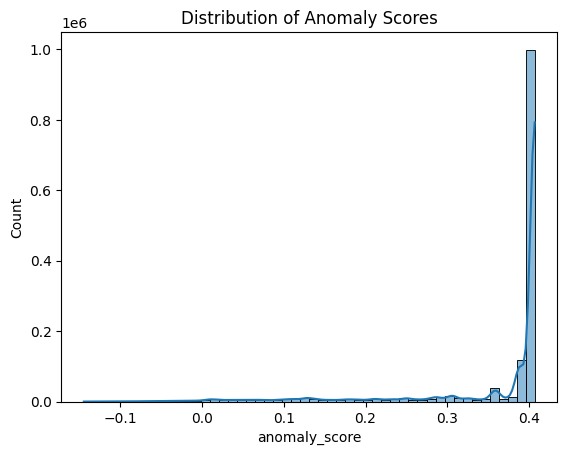

In [88]:
# Visualizing anomaly scores
import matplotlib.pyplot as plt
import seaborn as sns
features = ["total_addtocart", "total_views", "total_transaction", "session_length"]
user_features = user_group[features]

user_group["anomaly_score"] = iso_forest.decision_function(user_features)
sns.histplot(user_group["anomaly_score"], bins=50, kde=True)
plt.title("Distribution of Anomaly Scores")
plt.show()

In [83]:
final_df.shape

(2755641, 18)

## ALTERNATIVE

In [68]:
from sklearn.ensemble import IsolationForest

# Aggregate user behavior features from final_df
user_group = final_df.groupby("visitorid").agg(
    total_addtocart=("event", lambda x: (x == "addtocart").sum()),
    total_views=("event", lambda x: (x == "view").sum()),
    total_transaction=("event", lambda x: (x == "transaction").sum()),
    session_length=("timestamp", lambda x: (x.max() - x.min()).total_seconds())
).reset_index()

# Fit Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)
user_group["anomaly"] = iso_forest.fit_predict(user_group[["total_addtocart", "total_views", "total_transaction", "session_length"]])

# Identify abnormal users
abnormal_users = set(user_group[user_group["anomaly"] == -1]["visitorid"])
print(f"Total Abnormal Users Detected: {len(abnormal_users)}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total Abnormal Users Detected: 13996


In [85]:
# Filter out abnormal users
filtered_final_df = final_df[~final_df["visitorid"].isin(abnormal_users)]

print(f"Final Dataset Size After Filtering: {filtered_final_df.shape}")


Final Dataset Size After Filtering: (2320026, 18)


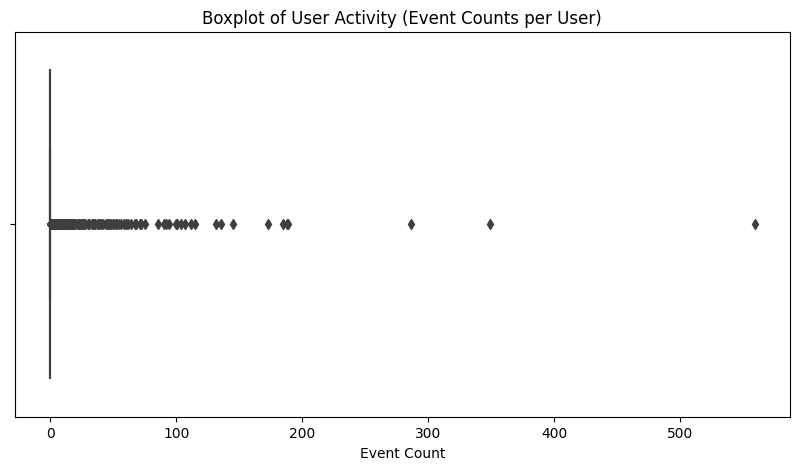

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


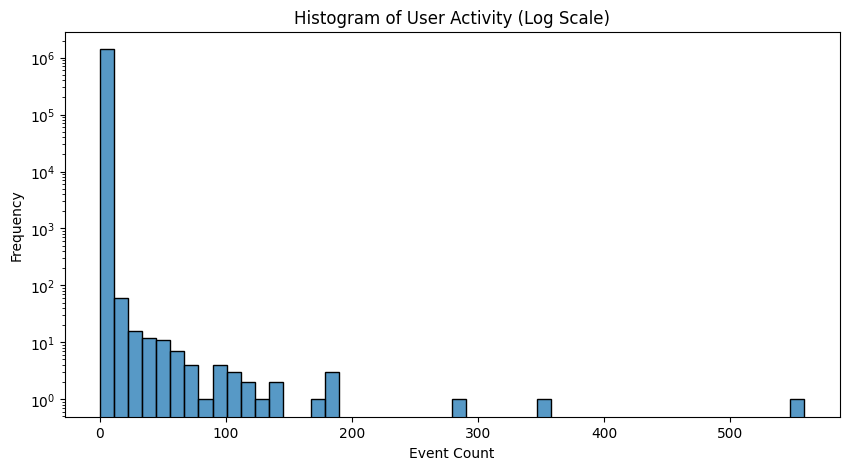

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute user activity (event counts per user)
#user_activity = events_df.groupby("visitorid").size().reset_index(name="event_count")

# Plot Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=user_group["total_transaction"])
plt.title("Boxplot of User Activity (transaction Counts per User)")
plt.xlabel("Event Count")
plt.show()

# Plot Histogram
plt.figure(figsize=(10, 5))
sns.histplot(x=user_group["total_transaction"], bins=50, log_scale=(False, True))
plt.title("Histogram of User Transaction Activity (Log Scale)")
plt.xlabel("Event Count")
plt.ylabel("Frequency")
plt.show()

In [90]:
filtered_final_df.head()

,timestamp,visitorid,event,itemid,transactionid,property,value,total_views,total_addtocart,total_transactions,cart_to_view_ratio,transaction_to_cart_ratio,transaction_to_view_ratio,item_views,item_addtocart,item_transactions,item_conversion_rate,session_length
0,2015-05-03 03:00:04.384,693516,addtocart,297662,-1,790,n14280.000,1,2,0,2.0,0.0,0.0,59,4,0,0.0,25.043
1,2015-05-03 03:00:11.289,829044,view,60987,-1,815,769062,1,0,0,0.0,0.0,0.0,79,0,0,0.0,0.000
2,2015-05-03 03:00:13.048,652699,view,252860,-1,-1,-1,1,0,0,0.0,0.0,0.0,248,0,0,0.0,0.000
3,2015-05-03 03:00:24.154,1125936,view,33661,-1,888,756593 1266042 1268055 1146137 424566 1297729 ...,1,0,0,0.0,0.0,0.0,63,0,0,0.0,0.000
4,2015-05-03 03:00:26.228,693516,view,297662,-1,790,n14280.000,1,2,0,2.0,0.0,0.0,59,4,0,0.0,25.043


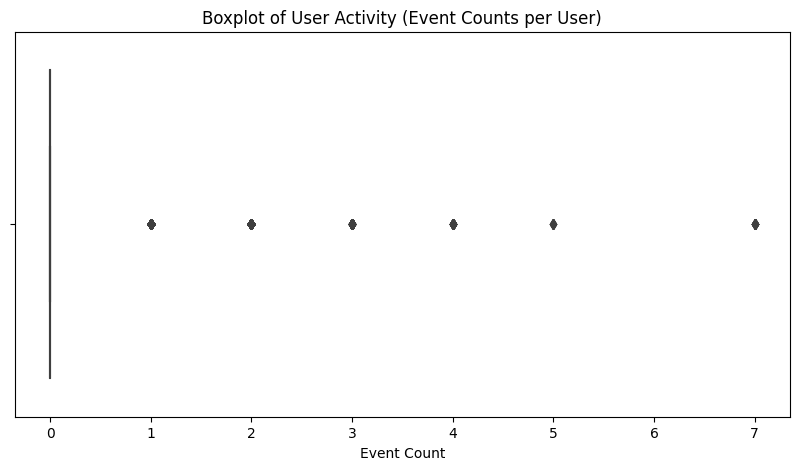

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


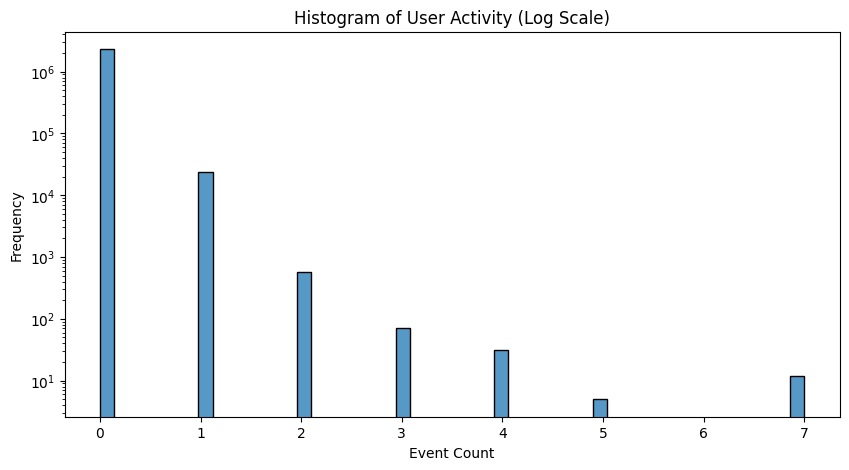

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute user activity (event counts per user)
#user_activity = events_df.groupby("visitorid").size().reset_index(name="event_count")

# Plot Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_final_df["total_transactions"])
plt.title("Boxplot of User Activity (Event Counts per User)")
plt.xlabel("Event Count")
plt.show()

# Plot Histogram
plt.figure(figsize=(10, 5))
sns.histplot(x=filtered_final_df["total_transactions"], bins=50, log_scale=(False, True))
plt.title("Histogram of User Activity (Log Scale)")
plt.xlabel("Event Count")
plt.ylabel("Frequency")
plt.show()

## Model building

In [1]:
final_df.columns

NameError: name 'final_df' is not defined

In [80]:
import pandas as pd

# Define interaction weights
def assign_weight(row):
    if row['event'] == 'view':
        return 1
    elif row['event'] == 'addtocart':
        return 2
    elif row['event'] == 'transaction':  # Assuming 'transaction' means purchase
        return 3
    return 0  # Default case

# Apply function to create interaction weights
final_df['interaction_weight'] = final_df.apply(assign_weight, axis=1)


In [81]:
feature = final_df[['visitorid', 'itemid', 'interaction_weight']]

In [83]:
from surprise import Dataset, Reader

# Define reader with rating scale (1 to 3 based on interaction strength)
reader = Reader(rating_scale=(1, 3))

# Load data into Surprise format
data = Dataset.load_from_df(feature, reader)

In [84]:
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Train-test split (80-20)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
model = SVD(n_factors=50, random_state=42)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate with RMSE
rmse_score = accuracy.rmse(predictions)
print(f"RMSE: {rmse_score:.4f}")

RMSE: 0.2230
RMSE: 0.2230


In [87]:
final_df["value"] = final_df["value"].astype(str)

In [88]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
value_encoder = LabelEncoder()

# Encode the 'value' column
final_df['value_encoded'] = value_encoder.fit_transform(final_df['value'])

# Now, 'value_encoded' is a numerical representation of the property values.

In [89]:
property_matrix = final_df.pivot_table(
    index='itemid', columns='property', values='value_encoded', aggfunc='first'
)
property_matrix.fillna(-1, inplace=True)  # Fill missing values with -1 (unknown)

In [ ]:
from surprise import SVD, Dataset, Reader

# Convert pivot table into long format for Surprise
df_long = property_matrix.stack().reset_index()
df_long.columns = ['itemid', 'property', 'value_encoded']

reader = Reader(rating_scale=(df_long['value_encoded'].min(), df_long['value_encoded'].max()))
data = Dataset.load_from_df(df_long, reader)

# Train model
trainset = data.build_full_trainset()
model = SVD(n_factors=50, random_state=42)
model.fit(trainset)

In [72]:
columns_to_drop = ['timestamp', 'event', 'transactionid', 'property', 'value', 
                   'total_transactions', 'cart_to_view_ratio', 'transaction_to_cart_ratio',
                   'transaction_to_view_ratio', 'item_views', 'item_addtocart', 'item_transactions']

# Find missing columns
missing_cols = [col for col in columns_to_drop if col not in final_df.columns]

if missing_cols:
    print(f"⚠️ Warning: These columns were not found and won't be dropped: {missing_cols}")

# Drop only existing columns
features = final_df.drop(columns=[col for col in columns_to_drop if col in final_df.columns])


In [73]:
print(features)

         visitorid  itemid  total_views  total_addtocart  \
0           693516  297662            1                2   
1           829044   60987            1                0   
2           652699  252860            1                0   
3          1125936   33661            1                0   
4           693516  297662            1                2   
...            ...     ...          ...              ...   
2755636     472345  301436            1                0   
2755637    1207677  310922            1                0   
2755638     255126   47467            1                0   
2755639     622226  345308            1                0   
2755640    1287495   98299            2                0   

         item_conversion_rate  session_length  
0                    0.000000          25.043  
1                    0.000000           0.000  
2                    0.000000           0.000  
3                    0.000000           0.000  
4                    0.000000          

In [67]:
!pip install scikit-surprise  # Install Surprise (only needed once)

# Data Handling
import pandas as pd
import numpy as np

# Surprise for Collaborative Filtering
from surprise import Dataset, Reader
from surprise import SVD, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse

# Visualization (Feature Importance & Evaluation)
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import random 

# Replace infinity values with NaN
features=features.replace([np.inf,-np.inf],np.nan)

# Fill NaN values with the median
features=features.fillna(features.median())
features.head(10)

,visitorid,itemid,total_views,total_addtocart,item_conversion_rate,session_length
0,693516,297662,1,2,0.000000,25.043
1,829044,60987,1,0,0.000000,0.000
2,652699,252860,1,0,0.000000,0.000
3,1125936,33661,1,0,0.000000,0.000
4,693516,297662,1,2,0.000000,25.043
5,1149227,29757,1,0,0.040541,0.000
6,477106,297347,1,0,0.000000,0.000
7,693516,297662,1,2,0.000000,25.043
8,181106,278445,2,0,0.000000,12.307
9,654913,149767,1,0,0.014085,0.000


In [77]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(train_data)  # Fit and transform training data

# Now apply it to test data
test_data_normalized = scaler.transform(test_data)  # Transform test data only


NameError: name 'train_data' is not defined

In [78]:
### Data preprocessing
## Split the data

train_data ,test_data = train_test_split(features,test_size =0.2,random_state=42)

## Normalize the features
"""scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)"""

AttributeError: 'DataFrame' object has no attribute 'raw_ratings'

In [98]:
final_df["vale"] = final_df["value"].astype(str)

In [99]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 19 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   timestamp                  datetime64[ns]
 1   visitorid                  int64         
 2   event                      object        
 3   itemid                     int64         
 4   transactionid              int64         
 5   property                   int64         
 6   value                      object        
 7   total_views                int64         
 8   total_addtocart            int64         
 9   total_transactions         int64         
 10  cart_to_view_ratio         float64       
 11  transaction_to_cart_ratio  float64       
 12  transaction_to_view_ratio  float64       
 13  item_views                 int64         
 14  item_addtocart             int64         
 15  item_transactions          int64         
 16  item_conversion_rate       float64  

In [70]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Encode properties numerically
from sklearn.preprocessing import LabelEncoder



property_encoder = LabelEncoder()
final_df["property_encoded"] = property_encoder.fit_transform(final_df["property"])

In [105]:
from scipy.sparse import csr_matrix

# Create a sparse interaction matrix (rows: users, columns: items, values: property_encoded)
interaction_sparse = csr_matrix((
    final_df["property_encoded"], 
    (final_df["visitorid"].astype("category").cat.codes, 
     final_df["itemid"].astype("category").cat.codes)
))

print("Sparse matrix shape:", interaction_sparse.shape)

Sparse matrix shape: (1407580, 235061)


In [73]:
import numpy as np

def get_svd_features(svd_model, df, trainset):
    """Extract user and item latent factors from SVD, handling unseen users/items."""
    
    num_factors = svd_model.n_factors  # Number of latent features
    
    def get_user_factors(uid):
        """Return latent factors for known users, else zero vector."""
        if trainset.knows_user(uid):
            return svd_model.pu[trainset.to_inner_uid(uid)]
        else:
            return np.zeros(num_factors)  # Unknown user → zero vector

    def get_item_factors(iid):
        """Return latent factors for known items, else zero vector."""
        if trainset.knows_item(iid):
            return svd_model.qi[trainset.to_inner_iid(iid)]
        else:
            return np.zeros(num_factors)  # Unknown item → zero vector

    user_factors = df["visitorid"].apply(get_user_factors).apply(pd.Series)
    item_factors = df["itemid"].apply(get_item_factors).apply(pd.Series)
    
    return user_factors, item_factors


In [74]:
# Get user and item latent factors from SVD
user_factors, item_factors = get_svd_features(svd_model, final_df, trainset)

# Rename columns
svd_feature_names = [f"user_factor_{i}" for i in range(user_factors.shape[1])] + \
                    [f"item_factor_{i}" for i in range(item_factors.shape[1])]

# Merge SVD features with the final dataset
svd_features = pd.concat([user_factors, item_factors], axis=1)
svd_features.columns = svd_feature_names

final_df = pd.concat([final_df, svd_features], axis=1)

print("Final dataset with SVD features shape:", final_df.shape)


ValueError: User 677050 is not part of the trainset.

## Step  Apply ALS (Alternating Least Squares)

In [4]:
!pip install scikit-surprise

In [1]:
from implicit.als import AlternatingLeastSquares
import numpy as np

# Convert sparse matrix to implicit format (confidence-based)
interaction_sparse.data = np.log1p(interaction_sparse.data)  # Scale for better convergence

# Train ALS Model
als_model = AlternatingLeastSquares(factors=50, iterations=20, regularization=0.1)
als_model.fit(interaction_sparse.T)  # Transpose because ALS expects (items × users)

print("ALS Model training complete!")

ModuleNotFoundError: No module named 'implicit'

## Predict properties for addtocart items

In [ ]:
# Function to get predicted property for each user-item pair
def predict_property(visitor_id, item_id):
    user_idx = final_df["visitorid"].astype("category").cat.codes[final_df["visitorid"] == visitor_id].values[0]
    item_idx = final_df["itemid"].astype("category").cat.codes[final_df["itemid"] == item_id].values[0]
    
    score = als_model.user_factors[user_idx] @ als_model.item_factors[item_idx].T  # Dot product
    return score

# Example Prediction
sample_user = final_df["visitorid"].iloc[0]
sample_item = final_df["itemid"].iloc[0]

predicted_property = predict_property(sample_user, sample_item)
print(f"Predicted Property for user {sample_user} and item {sample_item}: {predicted_property:.4f}")


### Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

# Get actual and predicted values
actual_values = interaction_sparse.data
predicted_values = [predict_property(u, i) for u, i in zip(final_df["visitorid"], final_df["itemid"])]

# Calculate RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
print(f"RMSE: {rmse:.4f}")

### AUC: ROC for implicit Feedback

In [ ]:
from sklearn.metrics import roc_auc_score

# Convert values to binary for ranking evaluation
actual_binary = (actual_values > 0).astype(int)
predicted_binary = (np.array(predicted_values) > np.mean(predicted_values)).astype(int)

# AUC Score
auc = roc_auc_score(actual_binary, predicted_binary)
print(f"AUC-ROC Score: {auc:.4f}")

### Precision-Recall Scores

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get actual and predicted values
actual_values = (interaction_sparse.data > 0).astype(int)  # Convert to binary (1 = relevant, 0 = irrelevant)
predicted_values = np.array([predict_property(u, i) for u, i in zip(final_df["visitorid"], final_df["itemid"])])

# Compute Precision-Recall
precision, recall, thresholds = precision_recall_curve(actual_values, predicted_values)

# Compute AUC-PR (Area under Precision-Recall Curve)
auc_pr = auc(recall, precision)

### Plotting Precision-RECALL curve

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'ALS Model (AUC = {auc_pr:.4f})')

# Random baseline (for comparison)
random_baseline = np.sum(actual_values) / len(actual_values)
plt.plot([0, 1], [random_baseline, random_baseline], linestyle='--', color='gray', label='Random Baseline')

# Labels & Styling
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
merged_df1["parentid"] = merged_df1["parentid_x"]

In [ ]:
merged_df1.isna().sum()

In [ ]:
merged_df1 = merged_df1.drop(columns = ["parentid_x","parentid_y"])

In [ ]:
merged_df1.head()

In [ ]:
merged_df1["available"] = merged_df1["available"].fillna(0).astype(int)

In [ ]:
merged_df1.info()

In [ ]:
merged_df1.isna().sum()

In [ ]:
merged_df1["parentid"] = merged_df1["parentid"].fillna(-1).astype(int)

In [ ]:
merged_df1["transactionid"] = merged_df1["transactionid"].fillna(-1).astype(int)

In [ ]:
merged_df1.isna().sum()

In [ ]:
"""# Filter out transactionid values that are -1
filtered_df = merged_df1[merged_df1['transactionid'] != -1]

# Group by itemid and count transactionid occurrences
item_popularity = filtered_df.groupby('itemid')['transactionid'].count().reset_index()

# Rename the column
item_popularity.rename(columns={'transactionid': 'transaction_count'}, inplace=True)

print(item_popularity.head())  # Verify the output"""


In [ ]:
import pandas as pd

# Feature 1: Event counts per item
event_counts = merged_df1.groupby(['itemid', 'event']).size().unstack(fill_value=0).reset_index()

# Feature 2: Total interactions per user
user_event_counts = merged_df1.groupby('visitorid')['event'].count().reset_index()
user_event_counts.rename(columns={'event': 'total_events'}, inplace=True)

# Feature 3: Extract temporal features from timestamp
merged_df1['hour'] = merged_df1['timestamp'].dt.hour
merged_df1['day_of_week'] = merged_df1['timestamp'].dt.dayofweek

# Feature 4: Item popularity based on transactions
item_popularity = merged_df1.groupby('itemid')['transactionid'].count().reset_index()
item_popularity.rename(columns={'transactionid': 'transaction_count'}, inplace=True)

# Merge newly created features back to the main DataFrame
merged_df1 = merged_df1.merge(event_counts, on='itemid', how='left')
merged_df1 = merged_df1.merge(user_event_counts, on='visitorid', how='left')
merged_df1 = merged_df1.merge(item_popularity, on='itemid', how='left')

# Fill missing values in new columns
#merged_df1.fillna(0, inplace=True)

print(merged_df1.head())  # Verify feature creation


In [ ]:
merged_df1.head()

In [ ]:
selected_columns = ["addtocart", "transaction", "view","available"]
correlation_matrix = merged_df1[selected_columns].corr()
print(correlation_matrix)

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
merged_df1.isna().sum()

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features (drop target variable from features)
features = merged_df1.drop(columns=["categoryid", "event","transaction_count","total_events","timestamp","day_of_week","hour","transactionid","visitorid","parentid"])  # Example: Predicting categoryid
target = merged_df1["categoryid"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train XGBoost Regressor
regressor = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

In [ ]:
# Feature Importance
importance = regressor.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Convert regression predictions into a binary class (Above vs Below median)
threshold = np.median(y_test)
y_binary_test = (y_test > threshold).astype(int)
y_binary_pred = (y_pred > threshold).astype(int)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_binary_test, y_binary_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Converted Regression Output)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

# Step 1: Define interaction weights
interaction_weights = {'view': 1, 'addtocart': 3, 'transaction': 5}

# Step 2: Apply weights to events
def apply_interaction_weights(df):
    df['interaction_score'] = df['event'].map(interaction_weights)
    return df

merged_df1 = apply_interaction_weights(merged_df1)

# Step 3: Create User-Item Interaction Matrix
user_item_matrix = merged_df1.pivot_table(index='visitorid', columns='itemid', values='interaction_score', fill_value=0)

# Step 4: Convert to numpy matrix for SVD
matrix = user_item_matrix.values

# Step 5: Apply SVD
num_latent_factors = 50  # Adjust latent factors based on dataset size
U, sigma, Vt = svds(matrix, k=num_latent_factors)

# Convert sigma to diagonal matrix
sigma = np.diag(sigma)

# Step 6: Reconstruct the predicted matrix
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate using RMSE (comparing original vs. predicted where interaction exists)
actual_values = matrix[matrix.nonzero()]
predicted_values = predicted_matrix[matrix.nonzero()]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"RMSE: {rmse}")

In [ ]:
item_properies_df.head()

In [78]:
!pip install umap-learn

^C


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [1]:
# Selecting numerical features only
df_numeric = final_df.copy().select_dtypes(include=['int'])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

NameError: name 'final_df' is not defined